# Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score

In [2]:
cancer = load_breast_cancer()
df_cancer= pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
input_features = list(df_cancer.columns[:-1])
target = df_cancer.iloc[:,-1:]

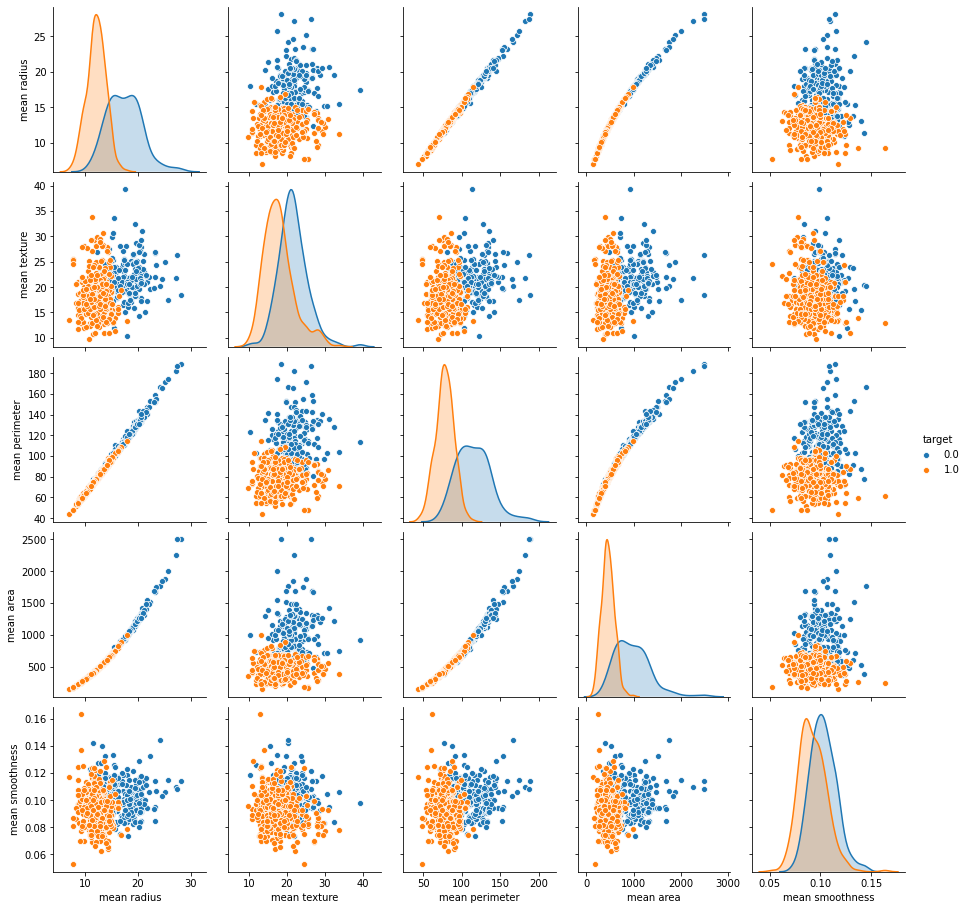

In [4]:
# Let’s plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

In [5]:
#1.0 (Orange) = Benign (No Cancer) 0.0 (Blue) = Malignant (Cancer)

In [6]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot:>

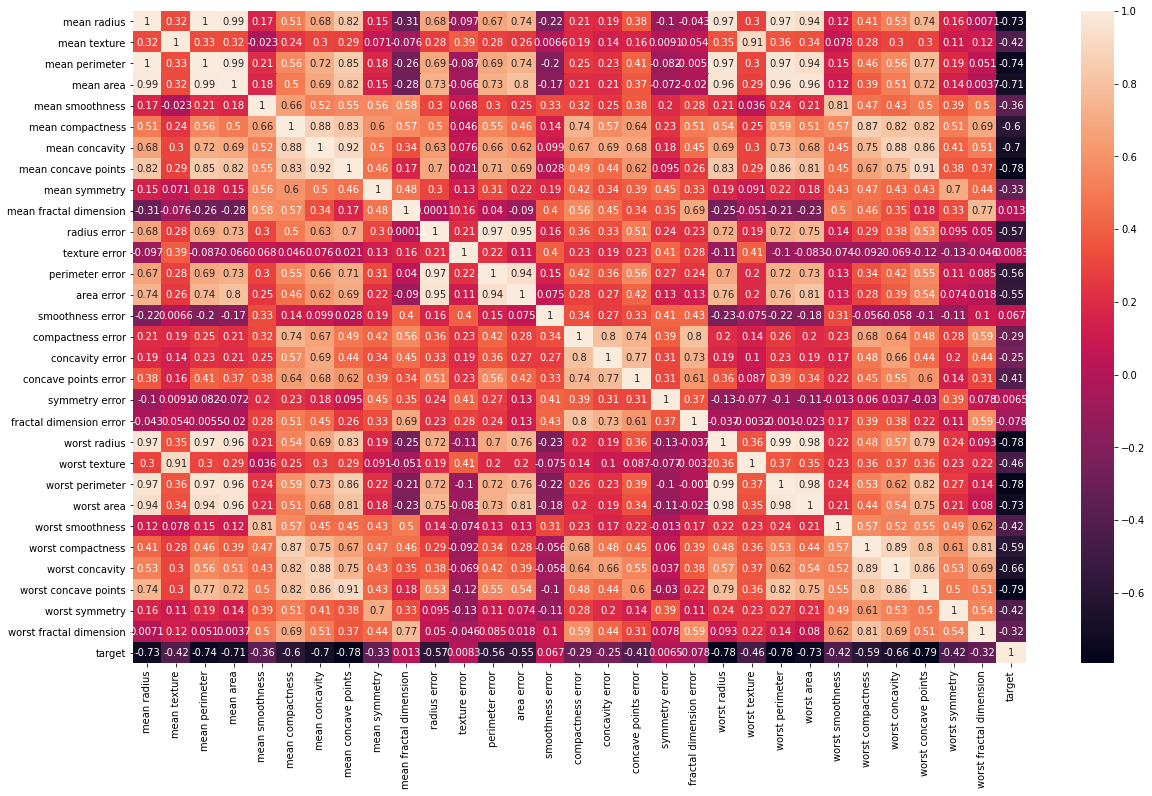

In [7]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True)

In [8]:
#Strong correlation between the mean radius and mean perimeter, mean area and mean perimeter

In [9]:
X = df_cancer.drop(['target'], axis = 1)
X.head()

y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [11]:
# Function to execute reusable code for multiple models,so as to perform cross validation

def execute_model(model,df,scoring_var,K_FOLD,input_features,target,jobs):

    model_name = type(model).__name__

    cv_results = cross_validate(
        model,    
        df[input_features], 
        df[target], 
        scoring=scoring_var,
        cv=K_FOLD,
        n_jobs=jobs
    )

    cv_results

    print()
    print('Total time CV took for ' + model_name + ':',      sum(cv_results['fit_time'])+sum(cv_results['score_time']), 'seconds')
    print('Average training time for ' + model_name + ':',   sum(cv_results['fit_time'])/K_FOLD, 'seconds')
    print('Average prediction time for ' + model_name + ':', sum(cv_results['score_time'])/K_FOLD, 'seconds')
    print()
    print('Average f1-score for ' + model_name + ':',        sum(cv_results['test_score'])/K_FOLD)
    print('Max f1-score achieved for ' + model_name + ':',   max(cv_results['test_score']))
    print('Min f1-score achieved for ' + model_name + ':',   min(cv_results['test_score']))

    cv_results = cross_val_score(
        model,                 
        df[input_features],
        df[target],       
        scoring=scoring_var,
        cv=K_FOLD,
        n_jobs=jobs
    )

    cv_predictions = cross_val_predict(
        model,  
        df[input_features], 
        df[target], 
        cv=K_FOLD, 
        n_jobs=jobs 
    )

    cv_f1_score = f1_score(df[target], cv_predictions, average='weighted')

    print()
    print(model_name + ' * f1_score =', round(cv_f1_score, 4))



In [12]:
# Try it with SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

In [13]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


<AxesSubplot:>

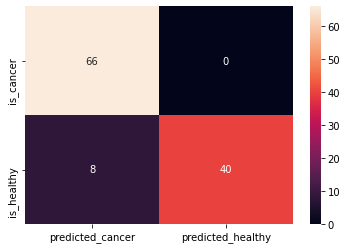

In [14]:
sns.heatmap(confusion, annot=True)

In [15]:
#Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [16]:
#Train Test Split
X_train_min = X_train.min()
X_train_min
X_train_max = X_train.max()
X_train_max
X_train_range = (X_train_max- X_train_min)
X_train_range
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [17]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [18]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [19]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91        48
         1.0       0.93      0.95      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.9824561403508771


In [21]:
#Perceptron
from sklearn.linear_model import Perceptron
pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(X_train, y_train)
print(pn.score(X_train,y_train))
print(pn.score(X_test,y_test))

0.9010989010989011
0.8947368421052632


In [22]:
#Changing the parameters below in order to tune our model,I ended up with this approach which gets a better score for test data.
#With shuffle=False there is an important reduce of accuracy.
pn = Perceptron(tol=1e-3, random_state=101, max_iter=1000,fit_intercept=True, eta0=0.0001,penalty='elasticnet',n_iter_no_change=2,shuffle=False)
pn.fit(X_train, y_train)
print(pn.score(X_train,y_train))
print(pn.score(X_test,y_test))

0.8241758241758241
0.7982456140350878


In [23]:
#With eta0=1.0 there is a small increase than the previous execution but it can be better
pn = Perceptron(tol=1e-3, random_state=101, max_iter=5000,fit_intercept=True, eta0=1.0,penalty='elasticnet',n_iter_no_change=2,shuffle=True)
pn.fit(X_train, y_train)
print(pn.score(X_train,y_train))
print(pn.score(X_test,y_test))

0.8769230769230769
0.9122807017543859


In [24]:
#After changing the parameters below in order to tune our model,I ended up with this approach which gets a better score for test data.
pn = Perceptron(tol=1e-3, random_state=101, max_iter=1000,fit_intercept=True, eta0=0.0001,penalty='elasticnet',n_iter_no_change=2)
pn.fit(X_train, y_train)
print(pn.score(X_train,y_train))
print(pn.score(X_test,y_test))

0.9032967032967033
0.9210526315789473


In [25]:
#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model = RandomForestClassifier()
execute_model(model,df_cancer,'f1_weighted',10,input_features,'target',5)

model = LogisticRegression()
execute_model(model,df_cancer,'f1_weighted',10,input_features,'target',5)

model = Perceptron()
execute_model(model,df_cancer,'f1_weighted',10,input_features,'target',5)

model = SVC()
execute_model(model,df_cancer,'f1_weighted',10,input_features,'target',5)


Total time CV took for RandomForestClassifier: 1.6219372749328613 seconds
Average training time for RandomForestClassifier: 0.1539062738418579 seconds
Average prediction time for RandomForestClassifier: 0.008287453651428222 seconds

Average f1-score for RandomForestClassifier: 0.9594753583348783
Max f1-score achieved for RandomForestClassifier: 0.9825365904115021
Min f1-score achieved for RandomForestClassifier: 0.8947368421052632

RandomForestClassifier * f1_score = 0.9665

Total time CV took for LogisticRegression: 0.2709615230560303 seconds
Average training time for LogisticRegression: 0.024996232986450196 seconds
Average prediction time for LogisticRegression: 0.002099919319152832 seconds

Average f1-score for LogisticRegression: 0.9452936937087987
Max f1-score achieved for LogisticRegression: 0.9652084757347914
Min f1-score achieved for LogisticRegression: 0.9282124229492651

LogisticRegression * f1_score = 0.9454

Total time CV took for Perceptron: 0.05700397491455078 seconds
Av

In [26]:
#Random Forest is the best suitable classification method for this case.Logistic Regression seem to be a case of Perceptron class.Their difference is that they use different functions, logistic regression uses a logistic function but perceptron uses a step function.In general they both yield in the same decision boundary.

# Iris Dataset

In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data
Y = iris.target

In [29]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(Y, columns=['Species'])


In [30]:
#Function to apply type on dataset
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [31]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [32]:
iris = pd.concat([iris_data, iris_target], axis=1)

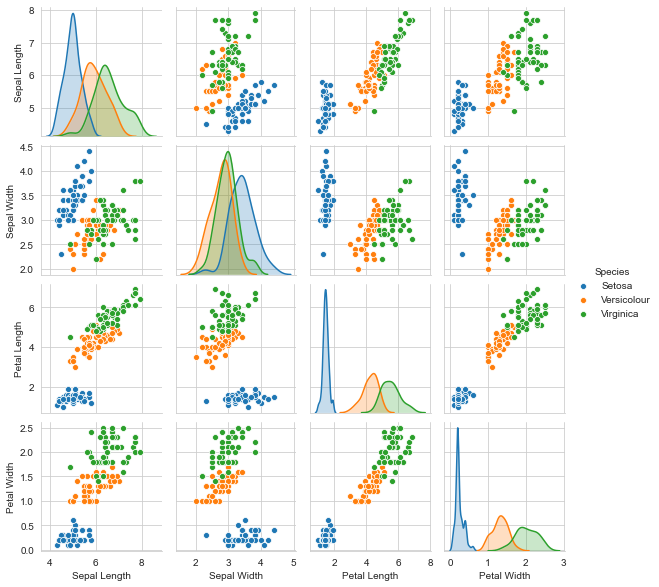

In [33]:
sns.pairplot(iris, hue='Species', size=2)

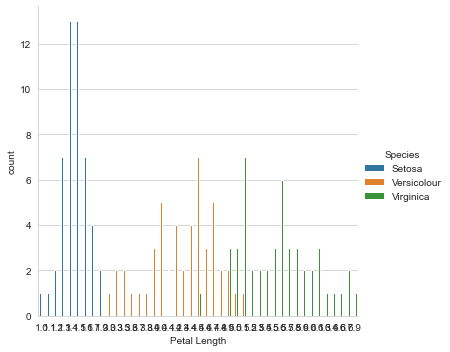

In [34]:
sns.factorplot('Petal Length', data=iris, hue='Species', size=5, kind='count')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Creating a perceptron instance with default values
pe = Perceptron()

#Split our set to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

#Fit out train data
pe.fit(X_train, Y_train)

Perceptron()

In [36]:
from sklearn import metrics

#Predict
Y_pred = pe.predict(X_test)

print(metrics.accuracy_score(Y_test, Y_pred))

0.7


In [37]:
#Changing different parameters in the perceptron classifier I ended up in this approach
pct = Perceptron(tol=1e-3, random_state=101, max_iter=5000,fit_intercept=False, eta0=0.0001,penalty='l2',n_iter_no_change=1,shuffle=True)
pct.fit(X_train, Y_train)
print(pct.score(X_train,Y_train))
print(pct.score(X_train,Y_train))

0.8444444444444444
0.8444444444444444


In [38]:
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model = Perceptron()

cv_results = cross_validate(
        model,    
        iris_data, 
        iris_target, 
        scoring='f1_weighted',
        cv=10,
        n_jobs=5
    )

print("cross_validate ")
cv_results

cross_validate 


{'fit_time': array([0.00403666, 0.00505519, 0.00502872, 0.00797415, 0.0070014 ,
        0.00400043, 0.0049994 , 0.00399756, 0.00399995, 0.00399947]),
 'score_time': array([0.00596762, 0.00494909, 0.00394583, 0.00199938, 0.00199938,
        0.00199866, 0.00200129, 0.00200129, 0.00300193, 0.00304294]),
 'test_score': array([0.55555556, 0.68253968, 0.54112554, 0.68253968, 0.68253968,
        0.54112554, 0.53418803, 0.55555556, 0.85606061, 0.55555556])}

In [40]:
cv_results = cross_val_score(
        model,                 
        iris_data,
        iris_target,       
        scoring='f1_weighted',
        cv=10,
        n_jobs=5
    )

print("cross_val_score ")
cv_results

cross_val_score 


array([0.55555556, 0.68253968, 0.54112554, 0.68253968, 0.68253968,
       0.54112554, 0.53418803, 0.55555556, 0.85606061, 0.55555556])

In [41]:
cv_predictions = cross_val_predict(
        model,  
        iris_data, 
        iris_target, 
        cv=10, 
        n_jobs=5 
    )
cv_predictions


array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolour', 'Virginica',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolour', 'Setosa',
       'Versicolour', 'Versicolour', 'Versicolour', 'Versicolour',
       'Versicolour', 'Setosa', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Vi

In [42]:
 from sklearn.metrics import f1_score
 cv_f1_score = f1_score(iris_target, cv_predictions, average='weighted')

In [43]:
cv_f1_score

0.646555807372233

In [44]:
#Perceptron does not seem to perform well enough in multiclassification cases like iris dataset.